# Data Preparation & Exploration

# Process
1. Visual inspection of data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

### Imputer
- 빠진 데이터를 쉽게 채워넣는 패키지
- Imputer(stratege='median','mean','most_frequent').fit_transform(df) -> output

### PolynomialFeatures
- 입력값 x를 다항식으로 변환한다.
    - x -> [1,x,x^2,...]
- degree: 차수
- interaciton_only: True면 2차항에서 상호작용항만 출력
- include_bias: 상수항 생성 여부

### VarianceThreshold
- 분산에 의한 선택
- 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법

### SelectFromModel
- 특성 중요도(feature importance)를 계산할 수 있는 랜덤 포레스트 등의 다른 모형을 사용하여 특성을 선택하는 방식

https://datascienceschool.net/view-notebook/bf8d9a70e92b48c2853449ec175c55ab/


### shuffle
- 입력된 1개 이상의 배열을 동일한 순서로 섞어준다

In [101]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## data at first sight
- -1: missing value
- target: 보험 계약자에 대한 청구가 접수되었는지 여부

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


- 이진 변수
- 범주형 변수의 정수화
- 정수 또는 실수형 변수
- -1 은 널 값 의미
- 종속 변수, Id 변수

In [5]:
train.shape

(595212, 59)

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

In [7]:
test.shape

(892816, 58)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Meta data
데이터 관리를 용이하게 하기 위해 변수들의 메타 정보를 데이터 프레임에 저장. 분석, 시각화, 모델링 등을 위해 변수 선택할 때 용이
- role: input, ID, target
- level: nominal, interval, ordinal, binary
- keep: True or False
- dtype: int, float, str

In [9]:
train['ps_car_15'].dtype

dtype('float64')

In [10]:
data = []
for f in train.columns:
    #defining the role
    if f=='target':
        role='target'
    elif f=='id':
        role='id'
    else:
        role='input'
        
    #defining the level
    if 'bin' in f or f =='target':
        level='binary'
    elif 'cat' in f or f=='id':
        level = 'nominal'
    elif train[f].dtype=='float64':
        level='interval'
    elif train[f].dtype=='int64':
        level='ordinal'
        
    #initialize keep to True for all variables except for id
    keep=True
    if f=='id':
        keep=False
        
    #defining the data type
    dtype=train[f].dtype
    
    #creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname','role','level','keep','dtype'])
meta.set_index('varname', inplace=True)

In [11]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [12]:
#삭제되지 않은 모든 명목 변수들을 추출하는 예
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [13]:
#role과 level 별 카운트
pd.DataFrame({'count': meta.groupby(['role','level']).size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics
- 범주형 변수는 기술 통계 적용 의미 없음
- 메타 데이터를 통해 기술 통계 적용할 변수들 쉽게 추출 가능

In [14]:
#interval variable(등간 변수)
v = meta[(meta.level == 'interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


#### reg variables
- reg_03에만 널값 존재(-1)
- 세 변수의 정도가 다르다
- 스케일링(StandardScaler, MinMaxScaler 등)을 적용할 수 있으나 분류기에 따라 다르다

#### car variables
- car_12와 car_15 에 널 값 존재
- 분포가 달라서 스케일링 적용 필요

#### calc variables
- 널 값 없음
- 최대값이 0.9이므로 일종의 비율
- 세 calc 변수들은 비슷한 분포를 가짐

#### Overall,
등간 변수 간 범위가 작음. 아마도 로그 변환같은 것이 이미 적용되었을 수도

In [15]:
#ordinal variables(서열 변수)
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* car_11에만 널 값 존재
* 다른 ranges을 다루기 위해 스케일링 적용 

In [16]:
#binary variables(이진 변수)
v = meta[(meta.level == 'binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* target 변수가 매우 불균형
- 평균으로부터 대부분 0에 가깝게 값이 분포하고 있음을 알 수 있음

## Handling imbalanced classes
target=1인 레코드의 비율은 target=0보다 훨씬 적음.
이로 인해 정확도는 높지가 실제로는 부가가치가 있는 모델이 생성될 수 있음.
1. target=1인 레코드 오버 샘플링
2. target=0인 레코드 언더 샘플링

train set가 상당히 크므로 언더샘플링 가능

MachineLearningMastery.com


In [102]:
desired_apriori = 0.10 

#get the indices per target value
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

#get original number of recoreds per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

#calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

#randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

#Construct list with remainig indices
idx_list = list(undersampled_idx) + list(idx_1)

#return undersample data frame
train=train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [18]:
nb_0 * 0.1

57351.8

In [19]:
nb_1*0.9

19524.600000000002

In [20]:
nb_1

21694

## Data Quality Checks

#### Checking missing values

In [21]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,0,1,5,1,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0
216936,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,-1.000000,11,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0
216937,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,0,1,7,1,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0
216938,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,1,0,0,11,1,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0


In [22]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


* ps_car_03_cat과 ps_car_05_cat은 널 값의 비중이 큼--> 제거
* 널 값이 있는 범주형 변수의 경우 그대로 -1로 둘 수 있음
* ps_reg_03(연속형)은 널 값이 18% 차지. mean으로 대체.
* ps_car_11(순서형)은 5개 레코드가 널 값. mode(최빈값)로 대체.
* ps_car_12, ps_car_14 -> mean으로 대체

In [103]:
#dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop, inplace = True, axis = 1)
meta.loc[(vars_to_drop), 'keep']=False #updating the meta

#Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()


### ravel()
- 다차원을 1차원으로 푸는 것
- 복사하지 않고 함께 변경, 즉 원본도 함께 변경

### reshape()
- 데이터 변경 없이 형상만 변경하여 반환

### flatten()
- 1차원배열 복사본을 반환

#### Checking the cardinality of the categorical variables
cardinality: 변수에 있는 서로 다른 값의 수

더미 변수를 만들 때 변수의 개수에 따라 다르게 처리해야 하므로

In [24]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


* ps_car_11_cat이 많은 distinct values를 가짐

In [25]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
# 노이즈 효과가 있을 것으로 염려되어 새로운 방식으로 변경

def add_noise(series, noise_level):
    return series * (1+ noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                tst_series=None,
                target=None,
                min_samples_leaf=1,
                smoothing=1,
                noise_level=0):
    """
    trn_series: training categorical feature as a pd.Series
    tst_series: test categorical feature as a pd.Series
    target: target data as a pd.Series
    min_sample_leaf(int): minimum samples to take category average into account
    smoothing(int): smoothing effect to balance categorical average vs prior
    스무딩 효과 - 데이터 셋에서의 노이즈를 제거하기 위함
    """
    assert len(trn_series) == len(target) #둘의 길이가 같으면 AssertionError 에러 발생
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    #compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])
    
    #compute smoothing
    smoothing = 1/(1+np.exp(-(averages['count']- min_samples_leaf)/smoothing))
    
    #apply average function to all target data
    prior = target.mean()
    
    #The bigger the count the less full_avg is taken into account
    averages[target.name] = prior*(1-smoothing) + averages['mean']*smoothing
    averages.drop(['mean','count'], axis=1, inplace=True)
    
    #apply average to trn and tst series
    ft_trn_series = pd.merge(trn_series.to_frame(tst_series.name),
                           averages.reset_index().rename(columns={'index': target.name, target.name:'average'}),
                           on=trn_series.name, how='left'
                           )['average'].rename(trn_series.name + '_mean').fillna(prior)

    #pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index': target.name, target.name:'average'}),
                            on=tst_series.name, how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    
    #pd.merge는 index를 저장 안하므로 다시 저장해야함
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [104]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], 
                                            test['ps_car_11_cat'],
                                           target = train.target,
                                           min_samples_leaf=100,
                                           smoothing=10,
                                           noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis = 1, inplace = True)
meta.loc['ps_car_11_cat', 'keep']=False #updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis = 1, inplace = True)


In [27]:
train['ps_car_11_cat_te']

0         0.093596
1         0.120401
2         0.095427
3         0.086746
4         0.108654
            ...   
216935    0.116815
216936    0.111591
216937    0.120566
216938    0.121437
216939    0.068145
Name: ps_car_11_cat_te, Length: 216940, dtype: float64

In [43]:
meta.loc['ps_car_11_cat_te','role']='input'
meta.loc['ps_car_11_cat_te','level']='interval'
meta.loc['ps_car_11_cat_te','role']='float64'
meta.loc['ps_car_11_cat_te','keep']=True


In [50]:
meta.drop('ps_car_11_cat_te', axis=0, inplace=True)

## Exploratory Data Visualization
#### categorical variables
범주형 변수와 우리의 목표(target=1)와의 비율 확인

<Figure size 432x288 with 0 Axes>

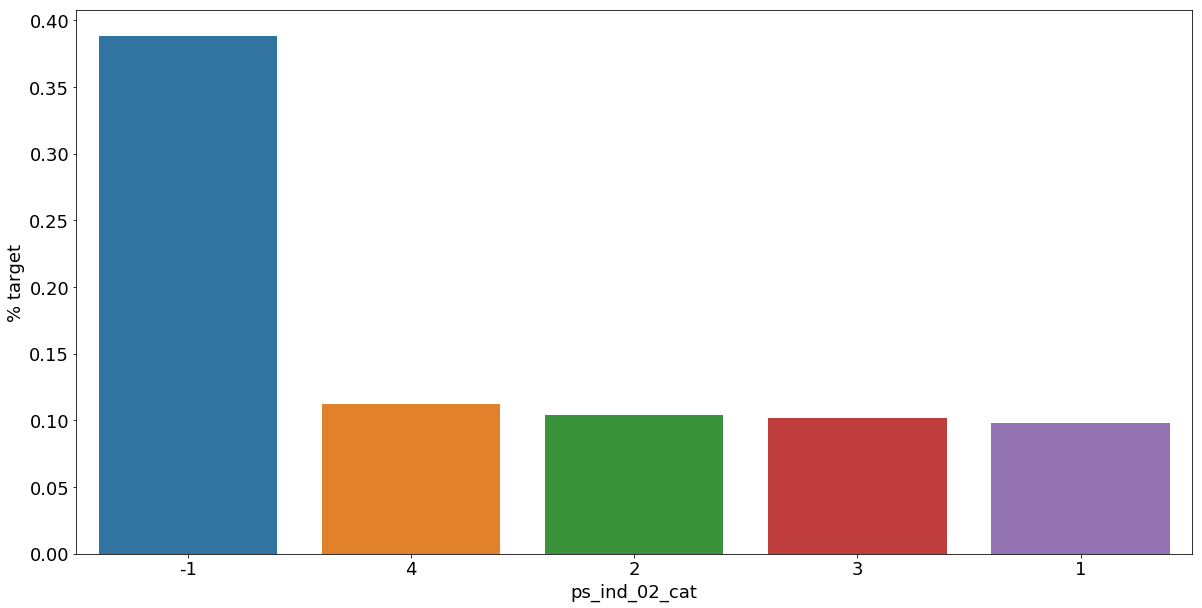

<Figure size 432x288 with 0 Axes>

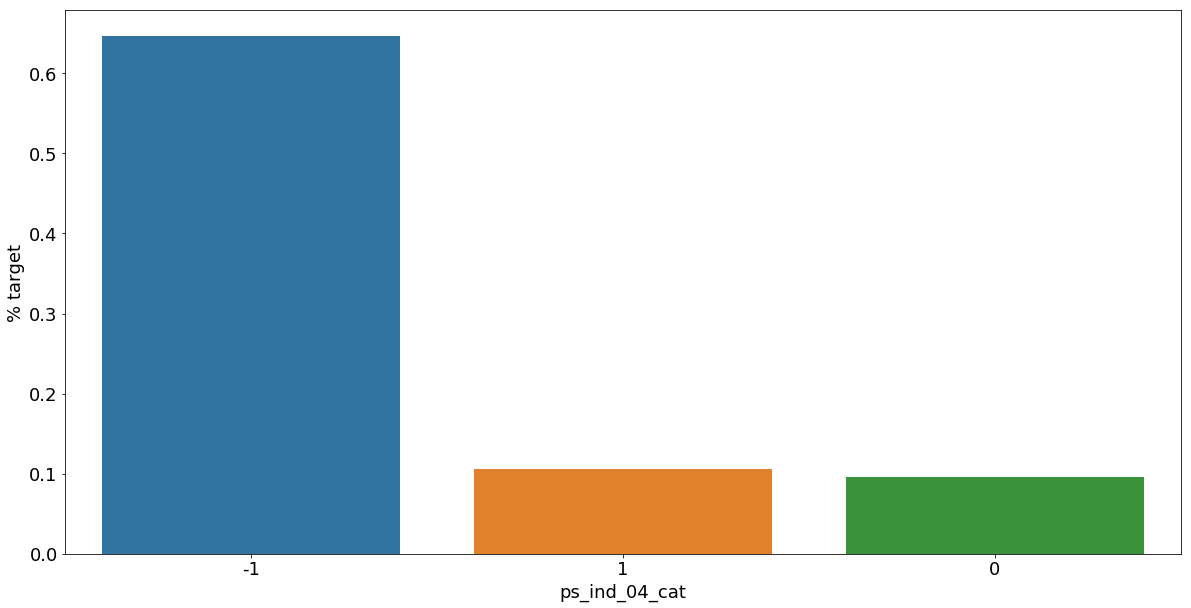

<Figure size 432x288 with 0 Axes>

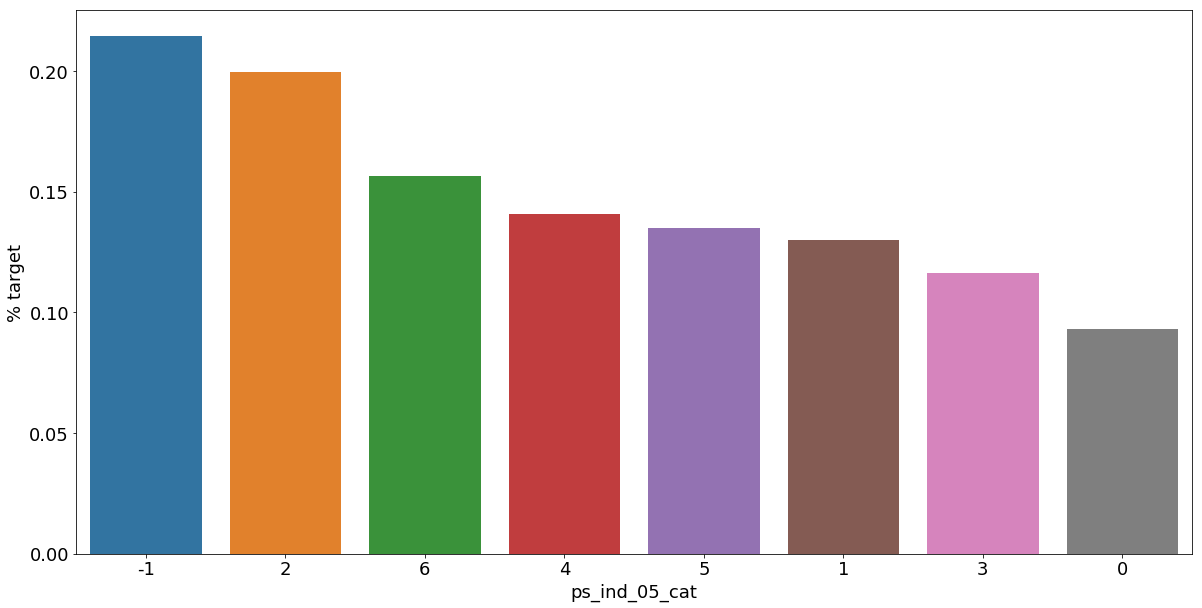

<Figure size 432x288 with 0 Axes>

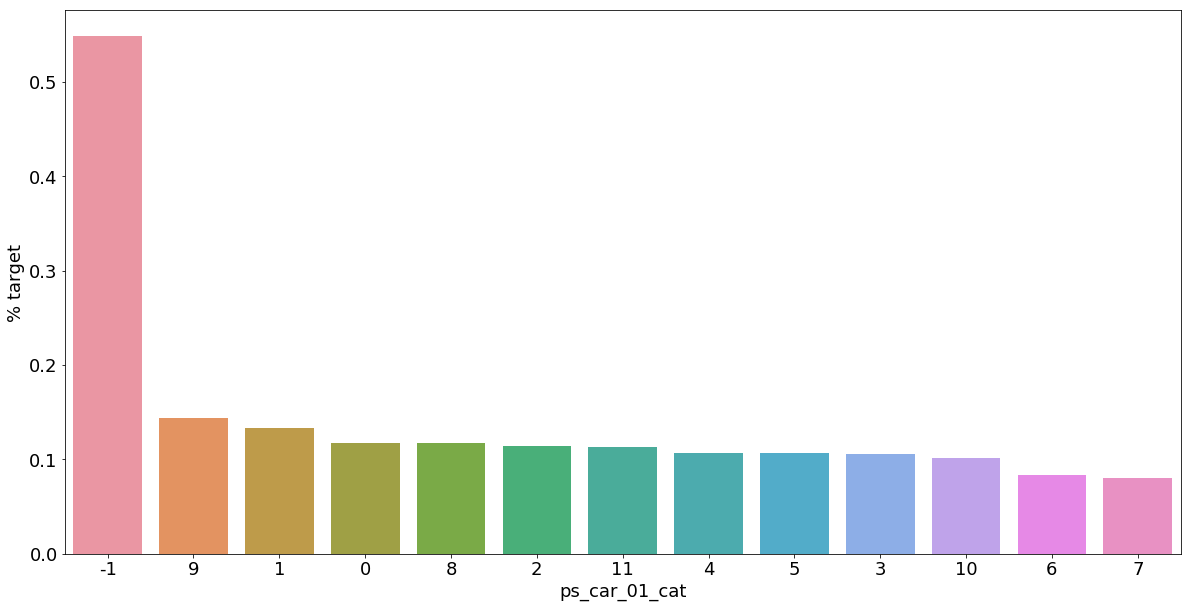

<Figure size 432x288 with 0 Axes>

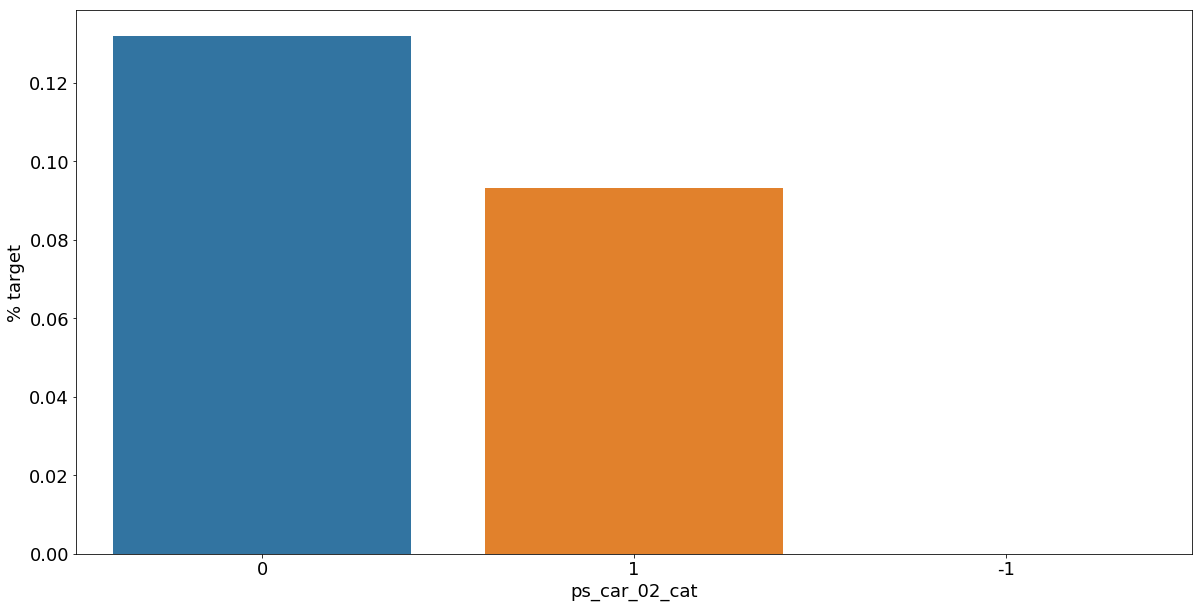

<Figure size 432x288 with 0 Axes>

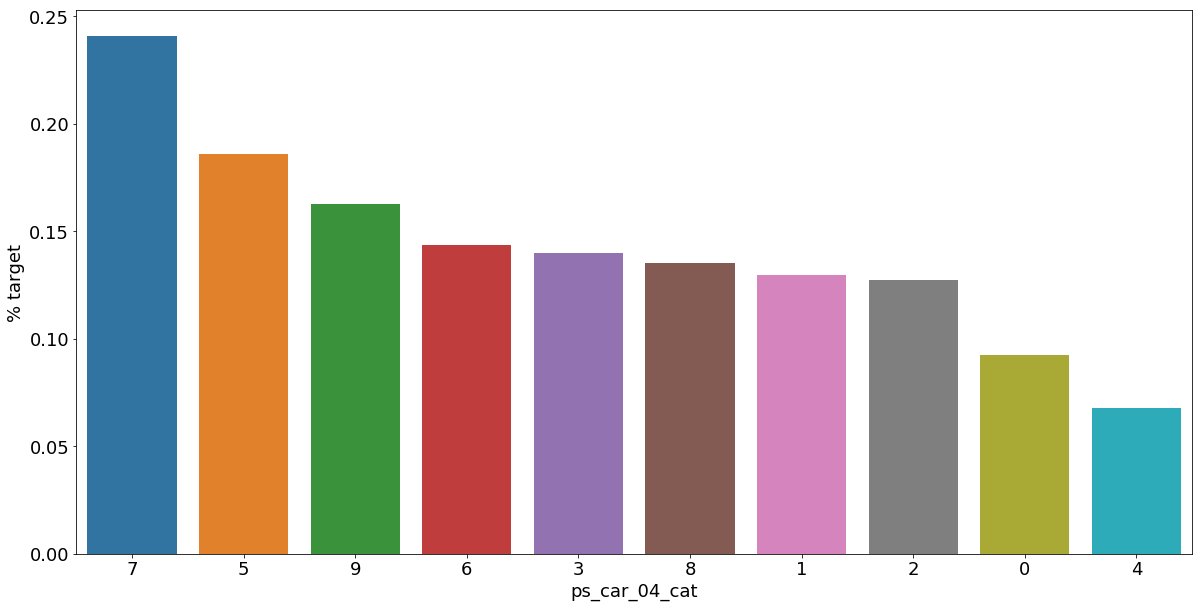

<Figure size 432x288 with 0 Axes>

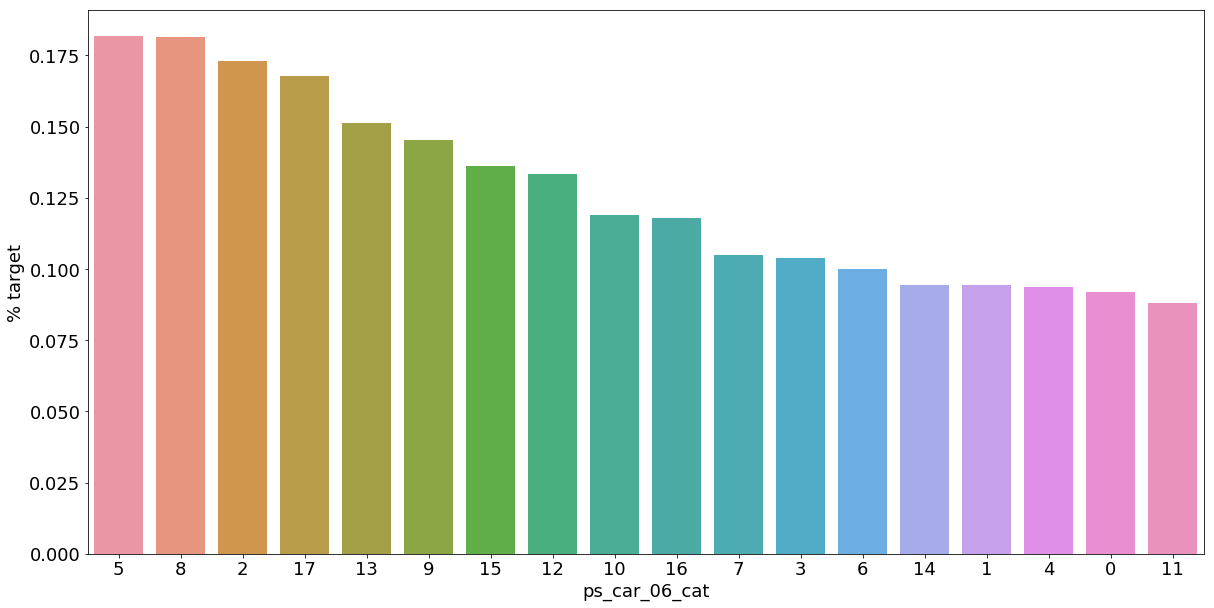

<Figure size 432x288 with 0 Axes>

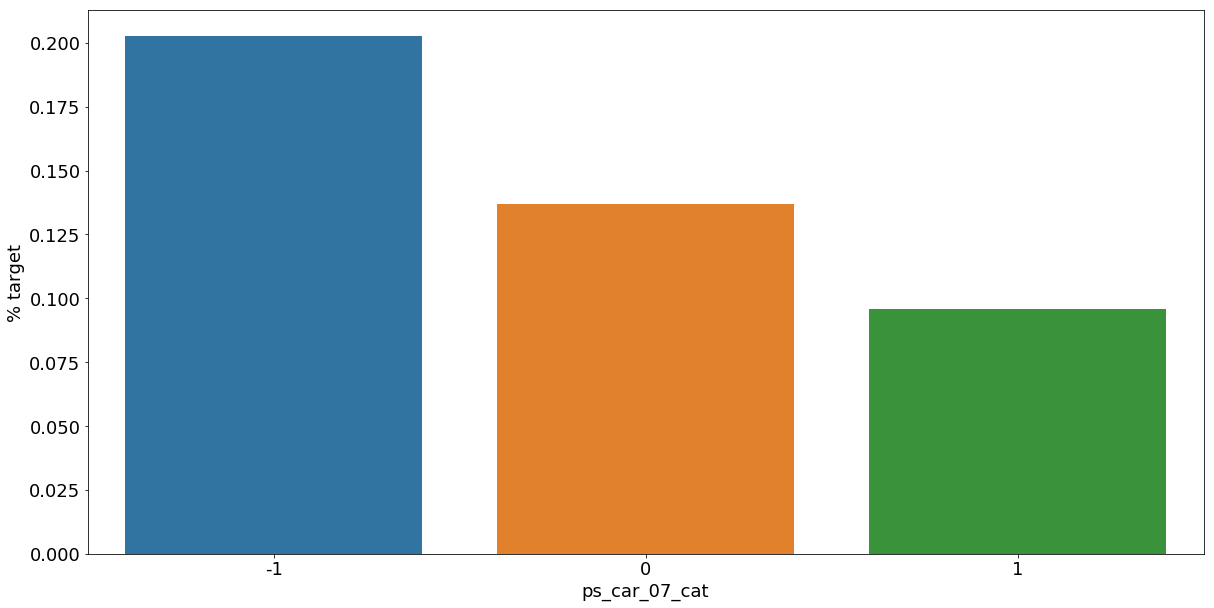

<Figure size 432x288 with 0 Axes>

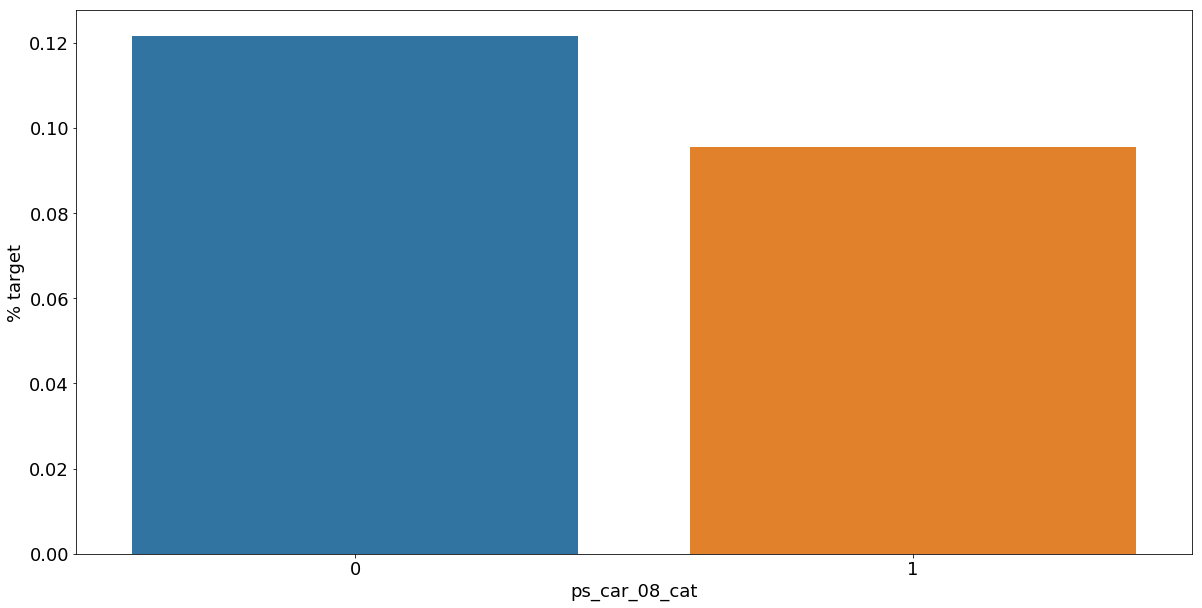

<Figure size 432x288 with 0 Axes>

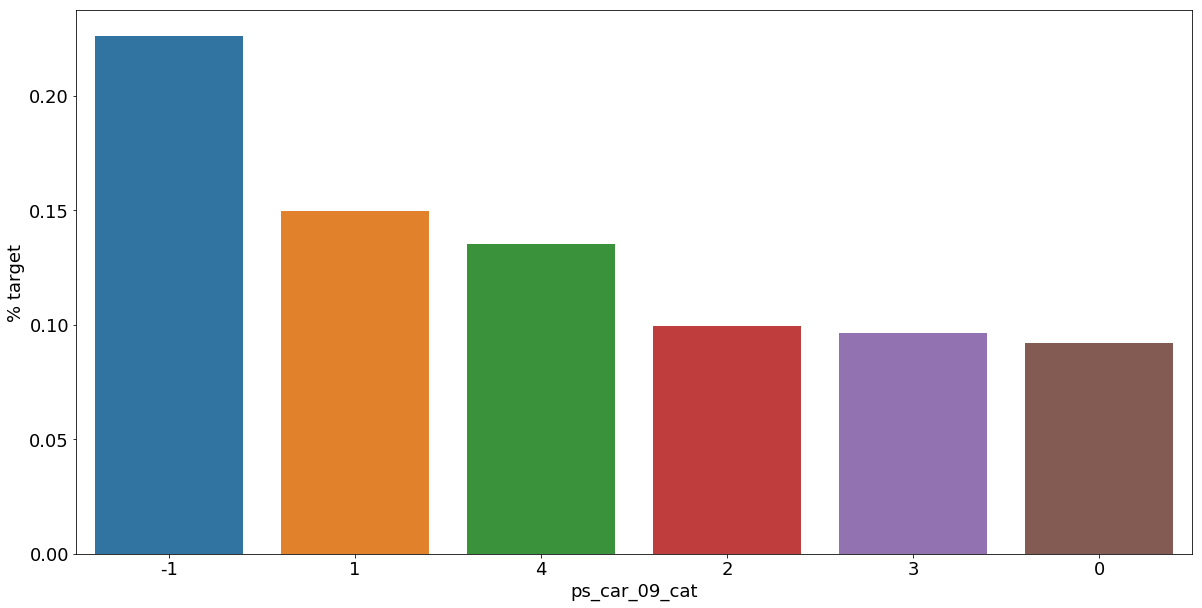

<Figure size 432x288 with 0 Axes>

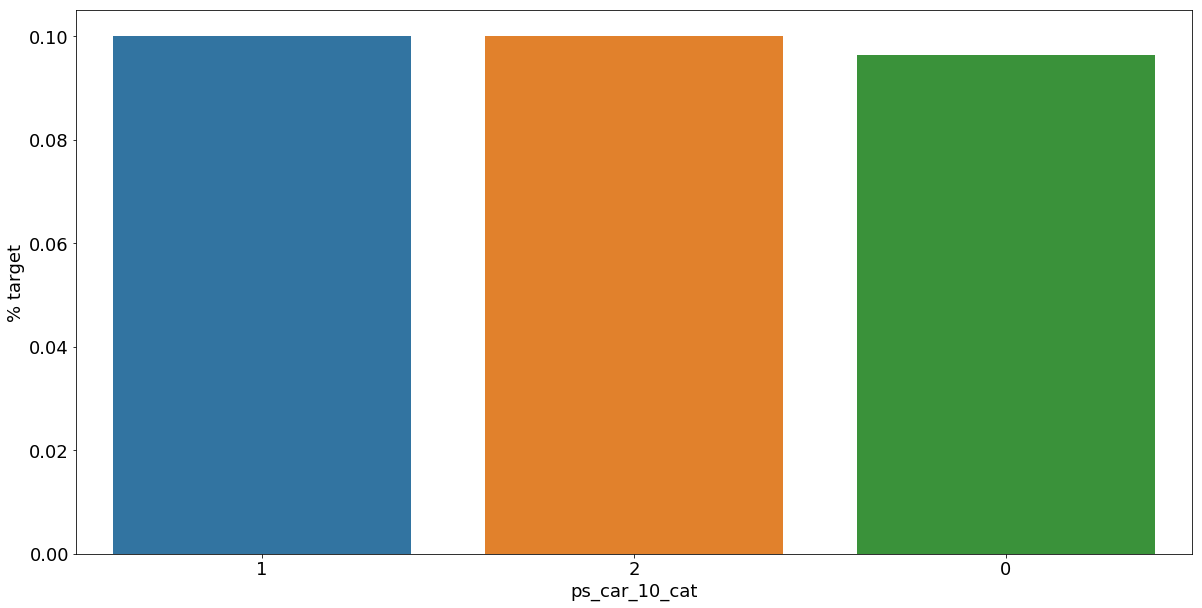

In [45]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    #범주형 변수 마다 타겟이 1인 비율 계산
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    #Bar Chart
    #Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which = 'major', labelsize=18)
    plt.show();

* 결측값이 있는 고객은 보험 청구를 요청할 가능성이 훨씬 더 높은 것으로 보임
* 결측값 채우지 않길 잘함

#### interval variables
등간변수 간 상관관계 확인

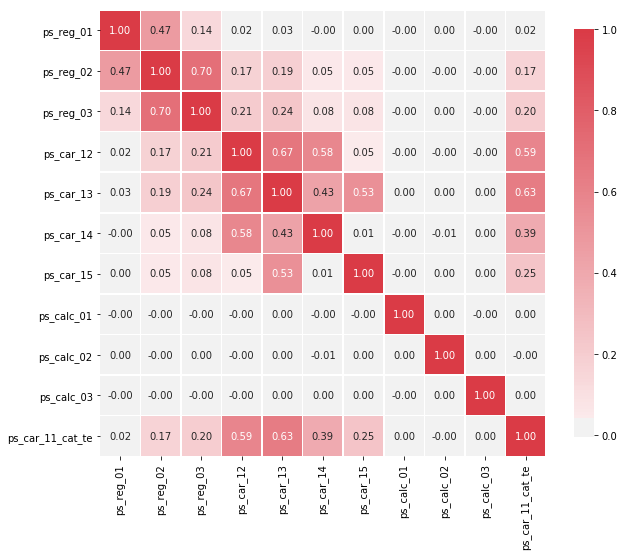

In [46]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    #create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square =True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

In [31]:
#프로세스를 높이기 위해 train에서 샘플 추출
s = train.sample(frac=0.1)

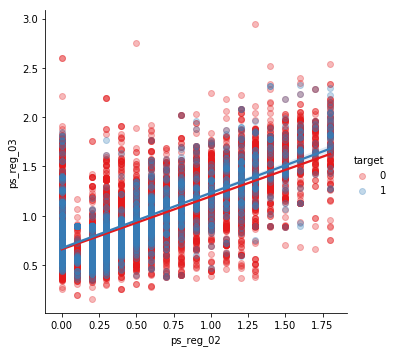

In [32]:
# ps_reg_02 and ps_reg_03 -> 0.7
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

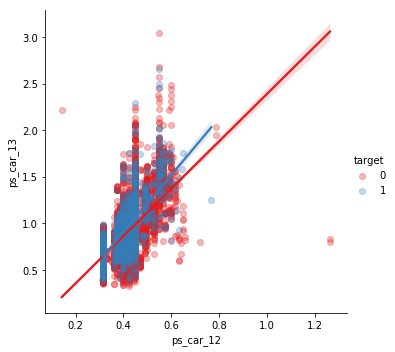

In [35]:
# ps_car_12 and ps_car_13 -> 0.67
sns.lmplot(x='ps_car_12', y = 'ps_car_13', data=s, hue='target',palette = 'Set1', scatter_kws={'alpha':0.3})
plt.show()

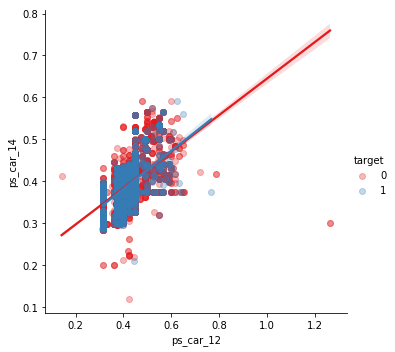

In [36]:
# ps_car_12 and ps_car_14 -> 0.58
sns.lmplot(x='ps_car_12', y='ps_car_14', data = s, hue = 'target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

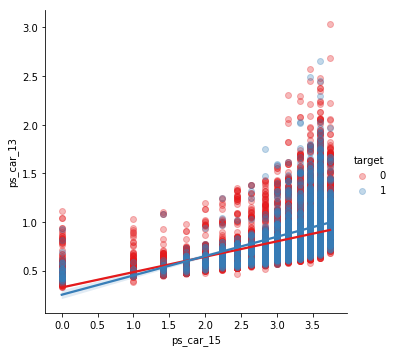

In [38]:
# ps_car_13 and ps_car_15-> 0.53
sns.lmplot(x='ps_car_15', y='ps_car_13', data = s, hue = 'target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

유지할 상관 변수를 어떻게 결정하나? PCA

그러나 상관 변수의 수가 적으므로 PCA 수행하지 않음

#### Checking the correalations between ordinal variables

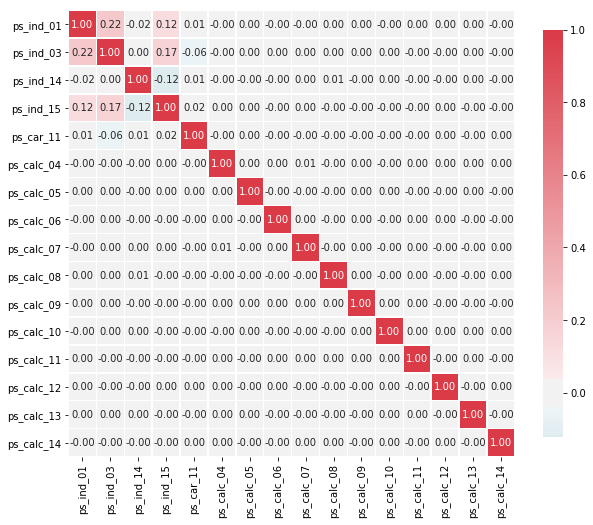

In [39]:
v=meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

상관관계는 별로 없지만 타겟 값에 따라 그룹핑을 할 때의 분포들이 어떻게 되는지는 확인 가능

## Feature engineering
#### creating dummy variables


In [105]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train=pd.get_dummies(train, columns=v, drop_first=True) #첫 번째의 더미가 다음 더미에 영향을 미칠 수 있으므로
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


In [106]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in test'.format(test.shape[1]))
test=pd.get_dummies(test, columns=v, drop_first=True) #첫 번째의 더미가 다음 더미에 영향을 미칠 수 있으므로
print('After dummification we have {} variables in test'.format(test.shape[1]))

Before dummification we have 58 variables in test
After dummification we have 110 variables in test


In [107]:
train

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_car_01_cat_0,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2
0,353762,0,1,1,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.094529,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
1,845629,0,5,7,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.120556,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
2,1449185,0,4,3,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.095109,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,834066,0,6,6,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.085520,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
4,436189,0,5,5,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.108326,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,7,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0,0.122475,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
216936,1487566,1,1,5,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,0.898861,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0,0.113799,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0
216937,1487716,1,0,6,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0,0.121226,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
216938,1487748,1,0,2,1,0,0,0,0,0,

#### Creating interaction variables

In [108]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) #Remove the original columns

#concat the interacion variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


In [54]:
interactions

,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00
1,0.81,0.54,0.655596,0.381838,0.344658,0.340933,0.000000,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36
2,0.81,0.54,0.782340,0.360000,0.732844,0.362131,2.984962,0.27,0.81,0.09,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,0.160,0.325708,0.160947,1.326650,0.120000,0.360000,0.040000,0.663037,0.327637,2.700631,0.244281,0.732844,0.081427,0.1619,1.334504,0.120710,0.362131,0.040237,11.0,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01
3,0.36,0.90,1.023523,0.240000,0.503032,0.227051,2.163331,0.48,0.24,0.06,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,0.15,2.910000,0.682349,1.430181,0.645532,6.150610,1.364698,0.682349,0.170587,0.160,0.335355,0.151367,1.442221,0.320000,0.160000,0.040000,0.702893,0.317260,3.022847,0.670710,0.335355,0.083839,0.1432,1.364405,0.302734,0.151367,0.037842,13.0,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01
4,0.64,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,1.180625,0.434626,0.984186,0.418151,3.917668,0.651939,0.543283,0.977909,0.160,0.362311,0.153935,1.442221,0.240000,0.200000,0.360000,0.820432,0.348577,3.265825,0.543466,0.452888,0.815199,0.1481,1.387552,0.230903,0.192419,0.346354,13.0,2.163331,1.802776,3.244996,0.36,0.30,0.54,0.25,0.45,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,0.36,0.24,0.922591,0.254558,0.761467,0.230825,1.897367,0.30,0.06,0.30,0.16,0.615061,0.169706,0.507645,0.153883,1.264911,0.20,0.04,0.20,2.364375,0.652371,1.951452,0.591547,4.862484,0.768826,0.153765,0.768826,0.180,0.538438,0.163218,1.341641,0.212132,0.042426,0.212132,1.610644,0.488237,4.013282,0.634556,0.126911,0.634556,0.1480,1.216553,0.192354,0.038471,0.192354,10.0,1.581139,0.316228,1.581139,0.25,0.05,0.25,0.01,0.05,0.25
216936,0.09,0.12,0.269658,0.127279,0.227094,0.120000,0.600000,0.09,0.12,0.18,0.16,0.359544,0.169706,0.302791,0.160000,0.800000,0.12,0.16,0.24,0.807951,0.3

In [109]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
#poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
test_interactions = pd.DataFrame(data=poly.fit_transform(test[v]), columns=poly.get_feature_names(v))
test_interactions.drop(v, axis=1, inplace=True) #Remove the original columns

#concat the interacion variables to the train data
print('Before creating interactions we have {} variables in test'.format(test.shape[1]))
test = pd.concat([test, test_interactions], axis=1)
print('After creating interactions we have {} variables in test'.format(test.shape[1]))

Before creating interactions we have 110 variables in test
After creating interactions we have 165 variables in test


## Feature selection
#### Removing features with low or zero variance

분산이 낮은 변수 제거

In [55]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id','target'], axis=1))

f = np.vectorize(lambda x:not x) # boolean 배열 요소를 전환하는 함수=> false to true
v = train.drop(['id','target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [63]:
f(selector.get_support())

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

분산의 값을 통해 변수를 선택하면 너무 많은 변수들이 삭제되므로 다른 방법으로 수행!!

#### Selecting features with a Random Forest and SelecFromModel

랜덤포레스트의 변수 중요도를 기반으로 변수 선택

In [65]:
X_train = train.drop(['id','target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances= rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1] # 처음부터 끝까지 -1칸 간격으로(역순)

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021128
 2) ps_car_13                      0.017361
 3) ps_car_12 ps_car_13            0.017296
 4) ps_car_13^2                    0.017212
 5) ps_reg_03 ps_car_13            0.017172
 6) ps_car_13 ps_car_14            0.017132
 7) ps_car_13 ps_car_15            0.016869
 8) ps_reg_01 ps_car_13            0.016680
 9) ps_reg_03 ps_car_14            0.016231
10) ps_reg_03 ps_car_12            0.015609
11) ps_reg_03 ps_car_15            0.015217
12) ps_car_14 ps_car_15            0.014990
13) ps_car_13 ps_calc_03           0.014698
14) ps_car_13 ps_calc_01           0.014692
15) ps_reg_01 ps_reg_03            0.014679
16) ps_car_13 ps_calc_02           0.014656
17) ps_reg_02 ps_car_13            0.014647
18) ps_reg_01 ps_car_14            0.014415
19) ps_reg_03                      0.014263
20) ps_reg_03^2                    0.014196
21) ps_reg_03 ps_calc_03           0.013830
22) ps_reg_03 ps_calc_02           0.013821
23) ps_reg_03 ps_calc_01        

SelectFromModel를 사용하면 사용할 적합 분류기와 변수 중요도에 대한 임계값을 지정할 수 있음. get_support 메소드를 사용하면 train set의 변수 수를 제한할 수 있음!

In [67]:
sfm = SelectFromModel(rf, threshold = 'median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [110]:
train = train[selected_vars + ['target'] + ['id']]

In [111]:
test = test[selected_vars + ['id']]

In [69]:
selected_vars

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_car_11_cat_te',
 'ps_reg_01^2',
 'ps_reg_01 ps_reg_02',
 'ps_reg_01 ps_reg_03',
 'ps_reg_01 ps_car_12',
 'ps_reg_01 ps_car_13',
 'ps_reg_01 ps_car_14',
 'ps_reg_01 ps_car_15',
 'ps_reg_01 ps_calc_01',
 'ps_reg_01 ps_calc_02',
 'ps_reg_01 ps_calc_03',
 'ps_reg_02^2',
 'ps_reg_02 ps_reg_03',
 'ps_reg_02 ps_car_12',
 'ps_reg_02 ps_car_13',
 'ps_reg_02 ps_car_14',
 'ps_reg_02 ps_car_15',
 'ps_reg_02 ps_calc_01',
 'ps_reg_02 ps_calc_02',
 'ps_reg_02 ps_calc_03',
 'ps_reg_03^2',
 'ps_reg_03 ps_car_12',
 'ps_reg_03 ps_car_13',
 'ps_reg_03 ps_car_14',
 'ps_reg_03 ps_car_15',
 'ps_reg_03 ps_calc_01',
 'ps_reg_03 ps_calc_02',
 'ps_re

In [117]:
test

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2,id
0,0,8,12,0.5,0.3,0.610328,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0.084075,0.25,0.15,0.305164,0.158114,0.334778,0.176068,1.732051,0.05,0.40,0.30,0.09,0.183098,0.094868,0.200867,0.105641,1.039230,0.03,0.24,0.18,0.372500,0.193003,0.408649,0.214919,2.114237,0.061033,0.488262,0.366197,0.10,0.211732,0.111355,1.095445,0.031623,0.252982,0.189737,0.448306,0.235775,2.319411,0.066956,0.535645,0.401734,0.1240,1.219836,0.035214,0.281709,0.211282,12.0,0.346410,2.771281,2.078461,0.01,0.08,0.06,0.64,0.48,0.36,0
1,4,5,5,0.9,0.5,0.771362,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0.074310,0.81,0.45,0.694226,0.284605,0.545688,0.322497,2.545584,0.36,0.45,0.36,0.25,0.385681,0.158114,0.303160,0.179165,1.414214,0.20,0.25,0.20,0.595000,0.243926,0.467692,0.276402,2.181742,0.308545,0.385681,0.308545,0.10,0.191735,0.113314,0.894427,0.126491,0.158114,0.126491,0.367624,0.217262,1.714932,0.242528,0.303160,0.242528,0.1284,1.013509,0.143332,0.179165,0.143332,8.0,1.131371,1.414214,1.131371,0.16,0.20,0.16,0.25,0.20,0.16,1
2,5,3,10,0.4,0.0,0.916174,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0.096757,0.16,0.00,0.366470,0.160000,0.358495,0.159399,1.326650,0.24,0.24,0.24,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.839375,0.366470,0.821111,0.365093,3.038606,0.549704,0.549704,0.549704,0.16,0.358495,0.159399,1.326650,0.240000,0.240000,0.240000,0.803244,0.357149,2.972487,0.537743,0.537743,0.537743,0.1588,1.321666,0.239098,0.239098,0.239098,11.0,1.989975,1.989975,1.989975,0.36,0.36,0.36,0.36,0.36,0.36,2
3,0,6,4,0.1,0.2,-1.000000,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,0.098520,0.01,0.02,-0.100000,0.037417,0.065211,0.038144,0.244949,0.01,0.05,0.05,0.04,-0.200000,0.074833,0.130422,0.076289,0.489898,0.02,0.10,0.10,1.000000,-0.374166,-0.652110,-0.381445,-2.449490,-0.100000,-0.500000,-0.500000,0.14,0.243997,0.142724,0.916515,0.037417,0.187083,0.187083,0.425248,0.248744,1.597338,0.065211,0.326055,0.326055,0.1455,0.934345,0.038144,0.190722,0.190722,6.0,0.244949,1.224745,1.224745,0.01,0.05,0.05,0.25,0.25,0.25,3
4,5,7,4,0.9,0.4,0.817771,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0.110167,0.81,0.36,0.735994,0.336749,0.731623,0.346588,2.984962,0.81,0.54,0.72,0.16,0.327109,0.149666,0.325166,0.154039,1.326650,0.36,0.24,0.32,0.668750,0.305982,0.664778,0.314922,2.712241,0.735994,0.490663,0.654217,0.14,0.304165,0.144090,1.240967,0.336749,0.224499,0.299333,0.660830,0.313051,2.696132,0.731623,0.487749,0.650331,0.1483,1.277224,0.346588,0.231058,0.308078,11.0,2.984962,1.989975,2.653300,0.81,0.54,0.72

## Feature scaling
- 훈련 데이터 셋에 스케일링 적용
- 몇몇 분류기는 이를 수행했을 때 더 성능이 좋을 수도

In [112]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop(['id','target'], axis=1))

In [113]:
train_scaled = pd.DataFrame(data = train_scaled, columns = train.drop(['id','target'], axis=1).columns)

In [114]:
train_scaled = pd.concat([train_scaled, train[['id','target']]], axis=1)

In [115]:
train_scaled

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2,id,target
0,-0.459411,-1.266654,1.050877,-0.045218,0.379366,-0.192498,-1.611334,-0.203898,-1.218613,-0.655642,-1.467096,1.566917,-0.522682,-1.568894,0.562577,-1.660012,-0.517289,0.000859,-0.838255,1.336707,-0.148493,-1.904763,-1.197623,0.665939,-0.560892,-0.228347,-0.320859,0.088258,-0.160083,-0.106478,-0.626754,-0.199819,-0.676227,1.133290,-0.411090,-1.182633,-0.008124,0.019430,0.278402,-0.137067,0.251059,-0.134217,1.348385,-0.079733,-0.792102,-0.293120,-0.251317,-0.738038,-0.370976,-0.897577,1.136361,-0.496611,-1.314795,-0.252648,-0.871261,-0.456482,-1.284574,1.412013,-0.533955,-1.507913,-0.907201,-1.078018,-1.414788,0.449983,-0.779056,-1.393891,-0.657991,-1.500506,1.295764,-0.589610,-1.532634,-1.744045,0.434042,-0.812245,-1.435052,1.956864,0.336293,-1.009825,-0.725536,-1.010719,-1.061738,353762,0
1,1.555390,0.950343,-0.638473,0.999101,0.379366,-0.540382,-1.611334,0.742076,-1.913216,0.093092,-4.206577,-0.869579,-1.569194,0.521864,-1.227707,-0.778680,-0.517289,1.413096,0.532277,1.336707,0.884019,-1.047321,-1.197623,0.075222,-0.197534,0.857646,1.148280,0.585660,0.243818,1.267577,-0.555376,0.999838,-1.864492,-0.409026,-1.182972,1.132241,-0.008124,-0.083950,0.472818,-0.363425,0.376732,-1.017747,-0.317136,-0.793786,0.631925,-0.538984,-0.251619,-1.168339,-0.477224,-2.262245,-0.839629,-1.313307,0.105257,0.643604,-1.137455,0.453191,-3.468466,-0.759498,-1.508479,0.731446,-1.216501,-1.442461,-2.424081,-1.101077,-1.394129,-0.523489,0.032995,-3.757638,-0.842423,-1.533498,0.532133,-2.913661,-1.432241,-1.435261,-1.435052,-0.912576,-1.010512,-0.411445,-1.061209,-1.010719,0.279079,845629,0
2,1.051689,-0.527655,-0.920031,0.999101,0.379366,-0.093839,0.784868,0.328373,-0.012842,0.625472,0.336338,-0.521508,1.570343,-1.220434,1.457719,-0.778680,0.232023,1.413096,0.532277,-0.270456,-0.148493,0.667563,0.466236,0.075222,0.892541,-0.204144,1.148280,0.585660,0.579055,1.080702,0.809850,1.190305,1.091279,-0.023447,2.290497,-0.796820,-0.008124,0.048749,0.387794,0.255869,0.466089,0.447422,-0.079205,1.348374,-0.554764,-0.217125,0.010924,-0.108682,0.091311,0.084810,-0.465981,1.227733,-1.032364,0.236217,0.040382,0.459488,0.459684,-0.450564,1.662581,-1.156032,-0.119533,0.148844,0.096924,-0.466617,1.385190,-1.085436,0.562751,0.599113,-0.434079,1.762457,-1.167109,0.302784,-0.400615,1.664204,-1.090865,-0.726249,0.336293,-0.860230,1.959845,-0.562153,-1.024493,1449185,0
3,2.059090,0.580843,0.206202,-0.045218,2.582369,2.558927,-0.413233,0.328373,0.093412,0.084138,0.732093,1.218846,-0.173845,-1.220434,0.562577,0.983986,-0.517289,-0.705259,1.217543,0.533125,0.539848,-1.476042,0.466236,-1.696930,2.345973,-0.604212,-0.320859,1.580463,1.216982,0.053811,0.001617,-

In [119]:
test_scaled = scaler.fit_transform(test.drop(['id'],axis=1))
test_scaled = pd.DataFrame(data = test_scaled, columns = test.drop(['id'],axis=1).columns)
test_scaled = pd.concat([test_scaled, test['id']], axis=1)
test_scaled

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2,id
0,-0.957649,1.328174,1.327840,-0.386017,-0.345627,0.073786,-1.619167,-1.091526,-0.640988,0.212157,0.542901,-1.217326,1.216353,0.521998,-1.227796,-0.778815,-1.265676,-0.006739,-2.208643,-0.271134,0.191591,-1.904861,-0.366699,-1.106809,1.624118,-0.650214,-0.672560,-0.484054,-0.375645,-0.637454,-0.579928,0.024505,-0.142005,-0.963879,0.533577,0.108017,-0.445759,-0.330850,-0.451443,-0.423760,-0.067058,-0.242928,-0.670606,0.166831,-0.071558,-0.813845,-0.064773,-0.080182,0.148880,0.158880,-0.413425,0.528712,0.260396,-0.977734,-0.774196,0.042064,-0.215572,-1.226762,0.720639,0.165001,-0.569490,0.040742,-0.247975,-1.137852,0.643668,0.134784,-0.356681,0.323232,-0.431095,0.761303,0.420757,0.601029,-1.072642,1.440870,0.723372,-1.023041,-0.610536,-0.709830,1.318660,1.381488,0.279027,0
1,1.055941,0.217124,-0.648475,1.004326,0.148594,0.276595,-1.619167,-1.091526,-0.922315,0.229513,-0.329076,-0.172805,0.172414,-0.174250,0.562790,0.980567,0.234114,0.699897,0.530034,-0.271134,-0.496555,-1.475691,-1.199602,0.073779,0.895754,-1.058995,1.154333,0.353155,0.446761,0.447544,0.165936,0.606306,0.663770,0.366278,0.747698,0.365436,-0.178885,-0.033786,-0.076884,-0.175540,0.233616,0.035788,0.009105,0.206742,0.008299,-0.491860,0.096997,0.001543,0.297725,0.185189,0.133840,0.302215,0.133071,-0.977734,-0.919905,0.055711,-0.813214,-0.390724,-0.114927,-0.392161,-0.743386,-0.014706,-0.816536,-0.469466,-0.241214,-0.470619,-0.337001,0.147411,0.092624,0.264777,0.090994,-0.569464,-0.257873,0.033237,-0.259360,-0.464328,-0.012330,-0.211206,-0.132015,-0.013503,-0.465674,1
2,1.559339,-0.523576,0.763179,-0.733603,-1.086959,0.458972,0.785645,0.343296,0.367482,0.342080,0.340602,0.523542,0.520394,0.521998,-0.332503,0.980567,-0.515781,0.699897,-2.208643,0.529763,1.223810,-0.617351,-1.199602,-0.516515,-1.289338,-0.119380,-0.966167,-0.902659,-0.246056,-0.621276,-0.496054,-0.041727,-0.543540,-0.148621,-0.151612,-0.149401,-0.595875,-0.599342,-1.013281,-0.911176,-0.499075,-1.015363,-0.790555,-0.791021,-0.790268,-0.138220,0.486281,0.490729,0.512437,0.519138,0.667058,0.664375,0.665676,0.250167,0.295191,0.376845,0.471818,0.609586,0.606296,0.607796,0.195519,0.404270,0.366295,0.654389,0.651654,0.651980,-0.201029,0.410006,0.556513,0.554979,0.555752,0.308406,0.633336,0.630452,0.631556,0.280622,0.785278,0.786044,0.277150,0.783635,0.279027,2
3,-0.957649,0.587474,-0.930805,-1.776360,-0.592738,-1.954277,-0.416761,-0.099184,-0.718602,0.294291,-0.848877,-1.217326,0.172414,0.173874,-0.332503,-0.778815,-0.515781,-0.006739,1.899372,-1.072031,1.567884,-0.188181,-0.366699,-1.697104,-0.925156,-0.045569,-1.455514,-0.846845,-1.232087,-1.672754,-1.533229,-0.523505,-1.614924,-1.135513,-0.965274,

# XGBoost CV

In [73]:
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50 

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from numba import jit
import time
import gc

In [75]:
# Compute gini

# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
@jit
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [76]:
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]

In [100]:
test

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0,8,12,0.5,0.3,0.610328,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0.084938,0.25,0.15,0.305164,0.158114,0.334778,0.176068,1.732051,0.05,0.40,0.30,0.09,0.183098,0.094868,0.200867,0.105641,1.039230,0.03,0.24,0.18,0.372500,0.193003,0.408649,0.214919,2.114237,0.061033,0.488262,0.366197,0.10,0.211732,0.111355,1.095445,0.031623,0.252982,0.189737,0.448306,0.235775,2.319411,0.066956,0.535645,0.401734,0.1240,1.219836,0.035214,0.281709,0.211282,12.0,0.346410,2.771281,2.078461,0.01,0.08,0.06,0.64,0.48,0.36
1,4,5,5,0.9,0.5,0.771362,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0.074717,0.81,0.45,0.694226,0.284605,0.545688,0.322497,2.545584,0.36,0.45,0.36,0.25,0.385681,0.158114,0.303160,0.179165,1.414214,0.20,0.25,0.20,0.595000,0.243926,0.467692,0.276402,2.181742,0.308545,0.385681,0.308545,0.10,0.191735,0.113314,0.894427,0.126491,0.158114,0.126491,0.367624,0.217262,1.714932,0.242528,0.303160,0.242528,0.1284,1.013509,0.143332,0.179165,0.143332,8.0,1.131371,1.414214,1.131371,0.16,0.20,0.16,0.25,0.20,0.16
2,5,3,10,0.4,0.0,0.916174,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0.098338,0.16,0.00,0.366470,0.160000,0.358495,0.159399,1.326650,0.24,0.24,0.24,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.839375,0.366470,0.821111,0.365093,3.038606,0.549704,0.549704,0.549704,0.16,0.358495,0.159399,1.326650,0.240000,0.240000,0.240000,0.803244,0.357149,2.972487,0.537743,0.537743,0.537743,0.1588,1.321666,0.239098,0.239098,0.239098,11.0,1.989975,1.989975,1.989975,0.36,0.36,0.36,0.36,0.36,0.36
3,0,6,4,0.1,0.2,-1.000000,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,0.095489,0.01,0.02,-0.100000,0.037417,0.065211,0.038144,0.244949,0.01,0.05,0.05,0.04,-0.200000,0.074833,0.130422,0.076289,0.489898,0.02,0.10,0.10,1.000000,-0.374166,-0.652110,-0.381445,-2.449490,-0.100000,-0.500000,-0.500000,0.14,0.243997,0.142724,0.916515,0.037417,0.187083,0.187083,0.425248,0.248744,1.597338,0.065211,0.326055,0.326055,0.1455,0.934345,0.038144,0.190722,0.190722,6.0,0.244949,1.224745,1.224745,0.01,0.05,0.05,0.25,0.25,0.25
4,5,7,4,0.9,0.4,0.817771,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0.108501,0.81,0.36,0.735994,0.336749,0.731623,0.346588,2.984962,0.81,0.54,0.72,0.16,0.327109,0.149666,0.325166,0.154039,1.326650,0.36,0.24,0.32,0.668750,0.305982,0.664778,0.314922,2.712241,0.735994,0.490663,0.654217,0.14,0.304165,0.144090,1.240967,0.336749,0.224499,0.299333,0.660830,0.313051,2.696132,0.731623,0.487749,0.650331,0.1483,1.277224,0.346588,0.231058,0.308078,11.0,2.984962,1.989975,2.653300,0.81,0.54,0.72,0.36,0.48,

In [120]:
# Process data
id_test = test['id'].values
id_train = train['id'].values
y = train['target']

In [143]:
X = train_scaled.drop(['target'], axis=1)

In [121]:
y_valid_pred = 0*y
y_test_pred = 0

In [122]:
# Set up folds
K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(0)

In [123]:
# Set up classifier
model = XGBClassifier(    
                        n_estimators=MAX_ROUNDS,
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=LEARNING_RATE, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                     )

In [137]:
f_cats = [f for f in X.columns if "_cat" in f]

In [138]:
f_cats

['ps_car_11_cat_te']

In [144]:
X

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2,id
0,-0.459411,-1.266654,1.050877,-0.045218,0.379366,-0.192498,-1.611334,-0.203898,-1.218613,-0.655642,-1.467096,1.566917,-0.522682,-1.568894,0.562577,-1.660012,-0.517289,0.000859,-0.838255,1.336707,-0.148493,-1.904763,-1.197623,0.665939,-0.560892,-0.228347,-0.320859,0.088258,-0.160083,-0.106478,-0.626754,-0.199819,-0.676227,1.133290,-0.411090,-1.182633,-0.008124,0.019430,0.278402,-0.137067,0.251059,-0.134217,1.348385,-0.079733,-0.792102,-0.293120,-0.251317,-0.738038,-0.370976,-0.897577,1.136361,-0.496611,-1.314795,-0.252648,-0.871261,-0.456482,-1.284574,1.412013,-0.533955,-1.507913,-0.907201,-1.078018,-1.414788,0.449983,-0.779056,-1.393891,-0.657991,-1.500506,1.295764,-0.589610,-1.532634,-1.744045,0.434042,-0.812245,-1.435052,1.956864,0.336293,-1.009825,-0.725536,-1.010719,-1.061738,353762
1,1.555390,0.950343,-0.638473,0.999101,0.379366,-0.540382,-1.611334,0.742076,-1.913216,0.093092,-4.206577,-0.869579,-1.569194,0.521864,-1.227707,-0.778680,-0.517289,1.413096,0.532277,1.336707,0.884019,-1.047321,-1.197623,0.075222,-0.197534,0.857646,1.148280,0.585660,0.243818,1.267577,-0.555376,0.999838,-1.864492,-0.409026,-1.182972,1.132241,-0.008124,-0.083950,0.472818,-0.363425,0.376732,-1.017747,-0.317136,-0.793786,0.631925,-0.538984,-0.251619,-1.168339,-0.477224,-2.262245,-0.839629,-1.313307,0.105257,0.643604,-1.137455,0.453191,-3.468466,-0.759498,-1.508479,0.731446,-1.216501,-1.442461,-2.424081,-1.101077,-1.394129,-0.523489,0.032995,-3.757638,-0.842423,-1.533498,0.532133,-2.913661,-1.432241,-1.435261,-1.435052,-0.912576,-1.010512,-0.411445,-1.061209,-1.010719,0.279079,845629
2,1.051689,-0.527655,-0.920031,0.999101,0.379366,-0.093839,0.784868,0.328373,-0.012842,0.625472,0.336338,-0.521508,1.570343,-1.220434,1.457719,-0.778680,0.232023,1.413096,0.532277,-0.270456,-0.148493,0.667563,0.466236,0.075222,0.892541,-0.204144,1.148280,0.585660,0.579055,1.080702,0.809850,1.190305,1.091279,-0.023447,2.290497,-0.796820,-0.008124,0.048749,0.387794,0.255869,0.466089,0.447422,-0.079205,1.348374,-0.554764,-0.217125,0.010924,-0.108682,0.091311,0.084810,-0.465981,1.227733,-1.032364,0.236217,0.040382,0.459488,0.459684,-0.450564,1.662581,-1.156032,-0.119533,0.148844,0.096924,-0.466617,1.385190,-1.085436,0.562751,0.599113,-0.434079,1.762457,-1.167109,0.302784,-0.400615,1.664204,-1.090865,-0.726249,0.336293,-0.860230,1.959845,-0.562153,-1.024493,1449185
3,2.059090,0.580843,0.206202,-0.045218,2.582369,2.558927,-0.413233,0.328373,0.093412,0.084138,0.732093,1.218846,-0.173845,-1.220434,0.562577,0.983986,-0.517289,-0.705259,1.217543,0.533125,0.539848,-1.476042,0.466236,-1.696930,2.345973,-0.604212,-0.320859,1.580463,1.216982,0.053811,0.001617,-0.023374,0.27

In [145]:
# Run CV

for i, (train_index, test_index) in enumerate(kf.split(train_scaled)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    X_test = test_scaled.copy()
    print( "\nFold ", i)
    
    """
    # Enocode data
    for f in f_cats:
        X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
                                                        trn_series=X_train[f],
                                                        val_series=X_valid[f],
                                                        tst_series=X_test[f],
                                                        target=y_train,
                                                        min_samples_leaf=200,
                                                        smoothing=10,
                                                        noise_level=0
                                                        )"""
    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        eval_set=[(X_valid,y_valid)]
        fit_model = model.fit( X_train, y_train, 
                               eval_set=eval_set,
                               eval_metric=gini_xgb,
                               early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                               verbose=False
                             )
        print( "  Best N trees = ", model.best_ntree_limit )
        print( "  Best gini = ", model.best_score )
    else:
        fit_model = model.fit( X_train, y_train )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  Gini = ", eval_gini(y_valid, pred) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict_proba(X_test)[:,1]
    
    del X_test, X_train, X_valid, y_train
    
y_test_pred /= K  # Average test set predictions

print( "\nGini for full training set:" )
eval_gini(y, y_valid_pred)


Fold  0
  Gini =  0.2246786144524413

Fold  1
  Gini =  0.24121904063647626

Fold  2
  Gini =  0.24028972162600526

Fold  3
  Gini =  0.22270005161399986

Fold  4
  Gini =  0.22570542540713523

Gini for full training set:


<ipython-input-75-491d77ce49f3>:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "eval_gini" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at <ipython-input-75-491d77ce49f3> (6)

File "<ipython-input-75-491d77ce49f3>", line 6:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    ^

  @jit
<ipython-input-75-491d77ce49f3>:4: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "eval_gini" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-75-491d77ce49f3>", line 12:
def eval_gini(y_true, y_prob):
    <source elided>
    n = len(y_true)
    for i in range(n-1, -1, -1):
    ^

  @jit
C:\Users\dldud\Anaconda3\lib\site-packages\numba\core\object_mode_passes.py:178: NumbaWarning: Function "eval_gini" was compiled in object mode without forceobj=True, but has lift

0.23075346756200543

In [146]:
# Save validation predictions for stacking/ensembling
val = pd.DataFrame()
val['id'] = id_train
val['target'] = y_valid_pred.values
val.to_csv('xgb_valid.csv', float_format='%.6f', index=False)

In [147]:
# Create submission file
sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = y_test_pred
sub.to_csv('xgb_submit.csv', float_format='%.6f', index=False)